In [16]:
from keras import layers
import tensorflow as tf

In [6]:
import os
from PIL import Image
import numpy as np
from random import shuffle

import matplotlib.pyplot as plt

In [7]:
import keras.preprocessing.image

import pandas as pd


In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers. normalization import BatchNormalization

In [9]:
from keras.datasets import mnist
from keras.utils import np_utils

In [10]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [11]:
x_train=x_train.astype("float32")
x_test=x_test.astype("float32")
x_train/=255
x_test/=255

In [19]:
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

In [13]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)


In [27]:
#lenet5 model
model=Sequential()

In [28]:
#Convolution layer 1
model.add(layers.Conv2D(6,kernel_size=(5,5),strides=(1,1),activation='tanh',input_shape=(28,28,1),padding="same"))
                        

In [29]:
#pooling layer
model.add(layers.AveragePooling2D(pool_size=(2,2),strides=(1,1),padding="valid"))
model.add(layers.Conv2D(16,kernel_size=(5,5),strides=(1,1),activation='tanh',padding="valid"))#convolution layer

In [30]:
model.add(layers.AveragePooling2D(pool_size=(2,2),strides=(2,2),padding="valid"))
#fully connected convolution layer
model.add(layers.Conv2D(120,kernel_size=(5,5),strides=(1,1),activation='tanh',padding="valid"))
model.add(layers.Flatten())


In [31]:
model.add(layers.Dense(84,activation='tanh'))#layer 6
model.add(layers.Dense(10,activation='softmax'))#output layer

In [32]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer='SGD',metrics=["accuracy"])

In [33]:
hist=model.fit(x=x_train,y=y_train,epochs=20,batch_size=128,validation_data=(x_test,y_test),verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 144s 2ms/step - loss: 0.6642 - acc: 0.8309 - val_loss: 0.3390 - val_acc: 0.9060
Epoch 2/20
60000/60000 [==============================] - 135s 2ms/step - loss: 0.3102 - acc: 0.9115 - val_loss: 0.2641 - val_acc: 0.9247
Epoch 3/20
60000/60000 [==============================] - 135s 2ms/step - loss: 0.2551 - acc: 0.9264 - val_loss: 0.2259 - val_acc: 0.9352
Epoch 4/20
60000/60000 [==============================] - 137s 2ms/step - loss: 0.2214 - acc: 0.9361 - val_loss: 0.2002 - val_acc: 0.9415
Epoch 5/20
60000/60000 [==============================] - 155s 3ms/step - loss: 0.1971 - acc: 0.9427 - val_loss: 0.1801 - val_acc: 0.9487
Epoch 6/20
60000/60000 [==============================] - 128s 2ms/step - loss: 0.1780 - acc: 0.9496 - val_loss: 0.1658 - val_acc: 0.9526
Epoch 7/20
60000/60000 [==============================] - 144s 2ms/step - 

In [36]:
test_score=model.evaluate(x_test,y_test)
print("test loss{:4f},accuracy{:2f}%".format(test_score[0],test_score[1]*100))


10000/10000 [==============================] - 11s 1ms/step
test loss0.075509,accuracy97.990000%


Text(0, 0.5, 'acc')

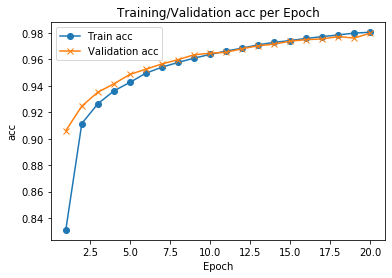

In [38]:
f, ax = plt.subplots()
ax.plot([None] + hist.history['acc'], 'o-')
ax.plot([None] + hist.history['val_acc'], 'x-')
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

Text(0, 0.5, 'Loss')

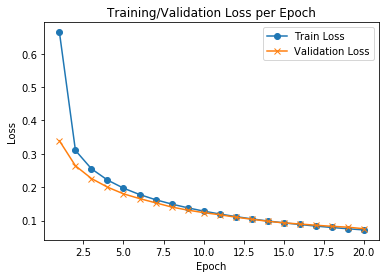

In [39]:
f, ax = plt.subplots()
ax.plot([None] + hist.history['loss'], 'o-')
ax.plot([None] + hist.history['val_loss'], 'x-')

ax.legend(['Train Loss', 'Validation Loss'], loc = 0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')